In [1]:
#Importing the Libraries
import pandas as pd

In [2]:
# Importing the Dataset
data=pd.read_csv('heart.csv')

In [3]:
# Taking Care of Missing Values
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
#Taking Care of Duplicate Values
data_dup=data.duplicated().any()

In [5]:
data_dup

True

In [6]:
data=data.drop_duplicates()

In [7]:
data_dup=data.duplicated().any()

In [8]:
data_dup

False

In [9]:
# Data Processing
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [11]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [12]:
#Encoding Categorical Data
cate_val


['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [13]:
data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

In [14]:
cate_val.remove("sex")
cate_val.remove("output")
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [15]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [16]:
#Feature Scaling
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st= StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [20]:
#Splitting The Dataset Into The Training Set And Test Set
X = data.drop('output',axis=1)

In [21]:
y = data['output']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [24]:
y_test

58     1
200    0
206    0
174    0
176    0
      ..
42     1
273    0
191    0
240    0
299    0
Name: output, Length: 61, dtype: int64

In [25]:
#Logistic Regression
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred1 = log.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_pred1)

0.819672131147541

In [31]:
#SVC
from sklearn import svm

In [32]:
svm = svm.SVC()

In [33]:
svm.fit(X_train,y_train)

SVC()

In [34]:
y_pred2=svm.predict(X_test)

In [35]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [36]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
y_pred3 = knn.predict(X_test)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [40]:
accuracy_score(y_test,y_pred3)

0.7868852459016393

In [41]:
#Non-Linear ML Algorithms
data = pd.read_csv('heart.csv')

In [42]:
data = data.drop_duplicates()

In [43]:
X = data.drop('output',axis=1)
y = data['output']


In [44]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state=42)

In [45]:
#. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

In [46]:
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [48]:
y_pred4 = dt.predict(X_test)

In [49]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

In [50]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier()

In [52]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred5 = rf.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

In [55]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc = GradientBoostingClassifier()

In [57]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [58]:
y_pred6 = gbc.predict(X_test)

In [59]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [60]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                           'ACC':[accuracy_score(y_test,y_pred1)*100,
                                 accuracy_score(y_test,y_pred2)*100,
                                 accuracy_score(y_test,y_pred3)*100,
                                 accuracy_score(y_test,y_pred4)*100,
                                 accuracy_score(y_test,y_pred5)*100,
                                 accuracy_score(y_test,y_pred6)*100]})

In [61]:
final_data

,Models,ACC
0,LR,52.459016
1,SVM,54.098361
2,KNN,52.459016
3,DT,77.049180
4,RF,86.885246
5,GB,85.245902


In [62]:
#bargraph
import seaborn as sns

C:\Users\Aditi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

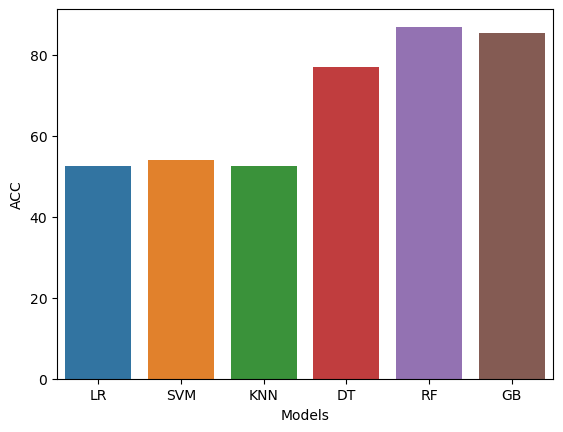

In [63]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [64]:
X=data.drop('output',axis=1)
y=data['output']

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [67]:
# Prediction on New Data
import pandas as pd

In [68]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thall':3,
},index=[0])

In [69]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thall
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [70]:
p = rf.predict(new_data)
if p[0]==1:
    print("No Disease ")
else:
    print("Disease is there")
    

Disease is there


C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- slope
- thalach
- trestbps
Feature names seen at fit time, yet now missing:
- caa
- exng
- slp
- thalachh
- trtbps

  warnings.warn(message, FutureWarning)


In [71]:
#. Save Model Using Joblib
import joblib

In [72]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [73]:
model=joblib.load('model_joblib_heart')

In [74]:
model.predict(new_data)

C:\Users\Aditi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- slope
- thalach
- trestbps
Feature names seen at fit time, yet now missing:
- caa
- exng
- slp
- thalachh
- trtbps

  warnings.warn(message, FutureWarning)


array([0], dtype=int64)

In [75]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [77]:
#GUI
from tkinter import *
import joblib

In [78]:
from tkinter import *
import joblib
import numpy as np
from sklearn import *

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text = "No Heart Disease", bg = "yellow", fg = "black").grid(row=31)
    else:
        Label(master, text = "Possibility of Heart Disease", bg = "yellow", fg = "black").grid(row=31)
        
        
master = Tk()
master.title('HEART DISEASE PREDICTION BY ADITI SHRIVAS')


label = Label(master, text = "HEART DISEASE PREDICTION SYSTEM",
             bg = "pink", fg = "black").\
                    grid(row=0,columnspan=2)



Label(master, text = "Enter your age").grid(row=1)
Label(master, text = "Male or Female [1/0]").grid(row=2)
Label(master, text = "Enter value of CP(Celebral Palsy)").grid(row=3)
Label(master, text = "Enter value of trestbps(Resting Blood)").grid(row=4)
Label(master, text = "Enter value of chol").grid(row=5)
Label(master, text = "Enter value of fbs").grid(row=6)
Label(master, text = "Enter value of restecg").grid(row=7)
Label(master, text = "Enter value of thalach").grid(row=8)
Label(master, text = "Enter value of exang(Exercise induced angina)").grid(row=9)
Label(master, text = "Enter value of oldpeak").grid(row=10)
Label(master, text = "Enter value of slope").grid(row=11)
Label(master, text = "Enter value of ca(Coronary artery)").grid(row=12)
Label(master, text = "Enter value of thallium stress").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)


Button(master,text = 'PREDICT' ,bg="light cyan",fg="black", command = show_entry_fields).grid(pady = 30)

mainloop()

model = joblib.load('model_joblib_hearts')